# Ford GoBike Data  - Exploratory Analysis

In our modern age with modern technology and transportation, cars aren't the only way to get around anymore. In addition to things like the rise of scooters like Lime, bike sharing has also become a recent thing in certain geographical locations. Throughout this project, we'll be specifically looking at data related to Ford GoBike. We'll look at gleaning some insights across several observations and looking at them with some data visualizations.

(Side note: As I'm doing this project, Ford's GoBike program has recently gotten some heat with its electric bikes in particular. Not that it impacts our observations here; I'm just simply noting the oddly coincidental timing!)

## Table of Contents

 - Gathering the Data
     - Quick Manual & Programmatic Assessment
 - Cleaning the Data
 - Univariate Exploration
 - Bivariate Exploration
 - Multivariate Exploration

In [3]:
#Importing the packages we'll be leveraging in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
from bs4 import BeautifulSoup
import datetime

## Gathering the Data

In this section, we'll be gathering the data we'll be leveraging throughout the project. Ford has so kindly made this data public via this link, so we'll be systematically downloading it and stitching it all together to work from. Because Ford continually updates this set, we'll be saving a copy to work from as of (INSERT DATE) so that we maintain consistent results throughout the project.

In [5]:
#Creating the file we'll be storing our data in
os.makedirs('ford-gobike-trip-data')

In [1]:
#WILL NEED TO REVISIT SYSTEMATIC IMPORT

In [2]:
#Congregating together all the datasets to be stitched into a dataframe in the next cell
path = r'C:\Users\ezv9\Desktop\ford-gobike-analysis\ford-gobike-trip-data'
raw_dfs = []

for file in os.listdir(path):
    raw_dfs.append(pd.read_csv(path + '/' + file))

In [3]:
#Stitching the datasets together into a dataframe
df = pd.concat(raw_dfs, sort=False)

In [4]:
#Quick check to see if it worked okay
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


In [5]:
#Saving stitched dataframe into a new file to work from moving forward for consistent results
df.to_csv('ford-gobike-combined.csv', index = False)

In [4]:
#Rebuilding the dataframe into the dataframe we'll be leveraging throughout the remainder of the project
gobike_df = pd.read_csv('ford-gobike-combined.csv')

C:\Users\ezv9\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Quick Manual & Programmatic Assessment
Now that we've got our dataframe in place, we'll do a quick initial analysis to see if there are any things we need to clean up. We'll do a further exploratory analysis later in this notebook.

In [3]:
gobike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1069787,454,2018-05-13 16:11:09.7040,2018-05-13 16:18:44.5650,86.0,Market St at Dolores St,37.769305,-122.426826,120.0,Mission Dolores Park,37.761420,-122.426435,3991,Customer,1997.0,Female,No
1334098,782,2018-06-01 17:23:42.8640,2018-06-01 17:36:45.2820,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,66.0,3rd St at Townsend St,37.778742,-122.392741,2795,Customer,1966.0,Male,No
824,1558,2017-12-31 13:41:00.7850,2017-12-31 14:06:59.1060,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,66.0,3rd St at Townsend St,37.778742,-122.392741,1349,Customer,NaN,NaN,NaN
2618637,469,2019-02-22 16:56:08.0550,2019-02-22 17:03:57.8170,22.0,Howard St at Beale St,37.789756,-122.394643,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1992,Subscriber,1975.0,Male,No
2469389,388,2019-01-21 16:45:24.2450,2019-01-21 16:51:53.1780,79.0,7th St at Brannan St,37.773492,-122.403672,58.0,Market St at 10th St,37.776619,-122.417385,2361,Subscriber,1995.0,Male,No


In [14]:
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 368.1+ MB


In [15]:
gobike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,3.015214e+06,3.002777e+06,3.015214e+06,3.015214e+06,3.002777e+06,3.015214e+06,3.015214e+06,3.015214e+06,2.808247e+06
mean,8.800043e+02,1.192539e+02,3.776874e+01,-1.223531e+02,1.174737e+02,3.776888e+01,-1.223526e+02,2.654638e+03,1.982997e+03
std,2.502496e+03,1.017029e+02,1.007025e-01,1.469537e-01,1.015882e+02,1.005976e-01,1.465561e-01,1.660454e+03,1.046344e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.878000e+03
25%,3.520000e+02,3.000000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.312000e+03,1.978000e+03
50%,5.570000e+02,8.700000e+01,3.778107e+01,-1.223983e+02,8.500000e+01,3.778127e+01,-1.223974e+02,2.531000e+03,1.985000e+03
75%,8.730000e+02,1.830000e+02,3.779539e+01,-1.222935e+02,1.820000e+02,3.779591e+01,-1.222948e+02,3.701000e+03,1.990000e+03
max,8.636900e+04,4.070000e+02,4.551000e+01,-7.357000e+01,4.070000e+02,4.551000e+01,-7.357000e+01,7.082000e+03,2.001000e+03


## Cleaning the Data

As you'll quickly see, Ford has actually given us a pretty clean dataset to work with. We'll make just a few quick adjustments before moving forward.

#### Adding an "Member Age" Column

This dataset kindly provides us with a member_birth_year field but not exactly an age field. Using 2019 as the current year, we'll create a new column that calculates age as of what it would be this year.

In [5]:
gobike_df['member_age'] = 2019 - gobike_df['member_birth_year']

In [6]:
gobike_df['member_age'].sample(5)

1700166    35.0
823330     36.0
2136969    41.0
912639     58.0
285981     58.0
Name: member_age, dtype: float64

#### Adding Age Groupings
Now that we've figured out ages for these folks, let's group them by decade.

Special thanks to thsi stackoverflow post for helping me figure this out: https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas

In [9]:
age_bins = [0, 19, 29, 39, 49, 59,
            69, 79, 89, 99]
age_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59',
              '60 - 69', '70 - 79', '80 - 89', '90 - 99']

gobike_df['age_group'] = pd.cut(gobike_df['member_age'], bins = age_bins, labels = age_labels, right = False)

In [12]:
gobike_df[['member_age', 'age_group']].sample(10)

,member_age,age_group
2454553,55.0,50 - 59
718776,33.0,30 - 39
2497833,39.0,40 - 49
551476,35.0,30 - 39
310215,47.0,40 - 49
2464585,40.0,40 - 49
761464,28.0,20 - 29
2021596,36.0,30 - 39
1710492,31.0,30 - 39
868680,34.0,30 - 39


#### Converting the 'start_time' and 'end_time' fields to datetime

The dataset gives us some good time stamps; however, they are provdied to us in a string format. Let's go ahead and convert them to the datetime format.

In [13]:
gobike_df['start_time'] = pd.to_datetime(gobike_df['start_time'])
gobike_df['end_time'] = pd.to_datetime(gobike_df['end_time'])

In [14]:
gobike_df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 2 columns):
start_time    datetime64[ns]
end_time      datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 46.0 MB


#### Adding a 'year-month' field

Now that we've converted our fields above into the datetime format, we'll extract the year and month for each row into its own column, 'year-month.'

(Thanks to this link for helping me figure this out: https://erikrood.com/Python_References/extract_month_year_pandas_final.html.)

In [15]:
gobike_df['year-month'] = pd.to_datetime(gobike_df['start_time']).dt.to_period('M')

In [16]:
gobike_df['year-month'].sample(5)

2439478   2019-01
702493    2018-02
2981551   2019-03
1431667   2018-07
128734    2017-11
Name: year-month, dtype: object

#### Dropping Columns

The following columns are being dropped for the following reasons:

 - **'start_station_id', 'start_station_latitude', and 'start_station_longitude'**: We'll keep start_station_name, but beyond the name, we don't have a much a use for the other fields.
 - **'end_station_id', 'end_station_latitude', and 'end_station_longitude'**: Same reason as the one above

In [17]:
columns_to_drop = ['start_station_id', 'start_station_latitude', 'start_station_longitude',
                   'end_station_id', 'end_station_latitude', 'end_station_longitude']

gobike_df.drop(columns = columns_to_drop, inplace = True)

In [18]:
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 13 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name         object
end_station_name           object
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
member_age                 float64
age_group                  category
year-month                 object
dtypes: category(1), datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 278.9+ MB


### Saving Clean Master Dataset

Now that we've finished our cleaning, let's save it into a master dataset for later use.

In [21]:
#Saving the clean master dataset
gobike_df.to_csv('ford-gobike-master.csv', index = False)

In [4]:
#Rebuilding our dataframe from the master CSV file
gobike_df = pd.read_csv('ford-gobike-master.csv')

C:\Users\ezv9\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Univariate Exploration

Let's begin by looking at a handful of univariate visualizations in this section of the notebook.

#### How long are people riding these bikes?

In this first analysis, we see a distribution of how long people are using these bikes in seconds. Because some outliers on the high end extremely skewed the data, I set a top limit of 2000 seconds. It's still right-skewed here, but at least we can see that the peak usage falls in that 250 - 750 second range, or more precisely, about 275 seconds. This is about ~4.5 minutes, so generally speaking, people are using these bikes for quick rides.

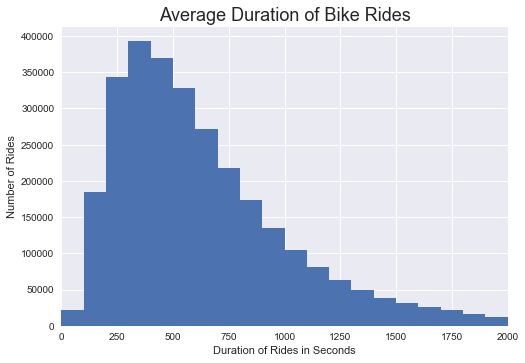

In [7]:
#Visualizing the data in a histogram
duration_bins = np.arange(0, gobike_df['duration_sec'].max() + 100, 100)
plt.hist(data = gobike_df, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2000);
plt.style.use('seaborn')
plt.title('Average Duration of Bike Rides', fontsize = 18);
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')

#### What age groups leverage these bikes the most?

In this visualization, we'll look at which ages leveraged these bikes the most. Because the dataset only includes age values for members, we'll create a separate dataframe ('gobike_df_membersonly') to properly reflect this.

With some playing around of the bins, we narrow our histogarm between ages 15 and 90. (The record set does contain a max value of 141, but that almost certainly is incorrect. :) )

In [8]:
#Creating dataframe 'gobike_df_membersonly' to only reflect records that contain age values
gobike_df_membersonly = gobike_df.dropna()

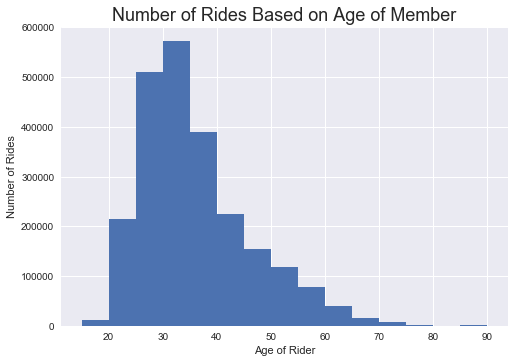

In [9]:
#Visualizing the data in a histogram
age_bins = np.arange(15, 90+5, 5)
plt.hist(data = gobike_df_membersonly, x = 'member_age', bins = age_bins);

plt.style.use('seaborn')
plt.title('Number of Rides Based on Age of Member', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

#### How many members vs. non-members do we have?

As noted in the previous visualization, not all people are members of this Ford GoBike program. Let's do a quick analysis of number of members vs. number of non-members. We'll do this in both an absolute count form and relative frequency form. In this, we get a clear picture that there are definitely far more members than non-members.

In [10]:
#Determining number of members and non-members
n_members = gobike_df_membersonly.shape[0]
n_nonmembers = gobike_df.shape[0] - n_members
print('Number of members: {}'.format(n_members))
print('Number of non-members: {}'.format(n_nonmembers))

Number of members: 2341442
Number of non-members: 673772


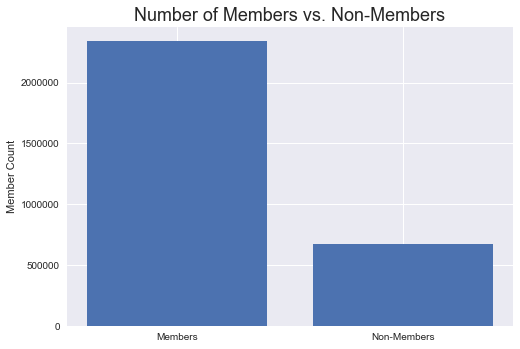

In [11]:
#Visualizing number of members vs. non-members in a pure count form
plt.bar(x = ['Members', 'Non-Members'], height = [n_members, n_nonmembers]);
plt.title('Number of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Member Count');
plt.style.use('seaborn')

In [12]:
#Determining ratios of members vs. non-members
member_percentage = n_members / gobike_df.shape[0]
nonmember_percentage = n_nonmembers / gobike_df.shape[0]
print('Ratio of members: {}'.format(member_percentage))
print('Ratio of non-members: {}'.format(nonmember_percentage))

Ratio of members: 0.776542560494877
Ratio of non-members: 0.223457439505123


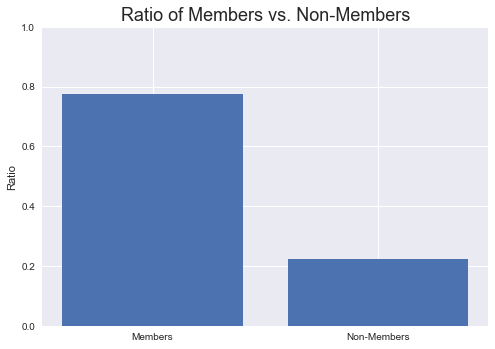

In [13]:
#Visualizing ratios of members vs. non-members
plt.bar(x = ['Members', 'Non-Members'], height = [member_percentage, nonmember_percentage]);
plt.title('Ratio of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Ratio');
plt.ylim(0,1);
plt.style.use('seaborn')

#### Number of Rides Per Month

And to wrap up this section, I'm curious to see if rides have generally gone up over time. Because my laptop had a difficult time chugging through the full dataset, I took a sample of 100000 records. I ran this a couple of times, and this general visualization appeared every time.

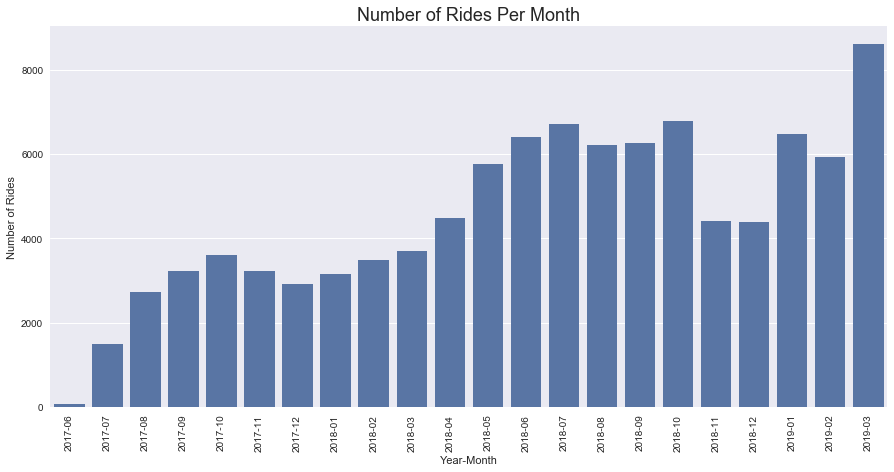

In [16]:
#Visualizing the data with a sample of 100000 records
plt.figure(figsize = (15, 7))
base_color = sb.color_palette()[0]
gobike_df_samp = gobike_df.sample(100000)
sb.countplot(data = gobike_df_samp.sort_values(by='year-month'), x = 'year-month', color = base_color);
plt.title('Number of Rides Per Month', fontsize = 18);
plt.xlabel('Year-Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

## Bivariate Exploration

Now that we've taken a look at some univariate explorations, let's take a look at some bivariate visualizations.

#### How many rides are people of different ages going on?
Let's start of this section by doing an analysis between the duration of the ride and how old the person is. As visualization shows, it's pretty clear there's a right skew, where people around age 30 tend to take the longest rides.

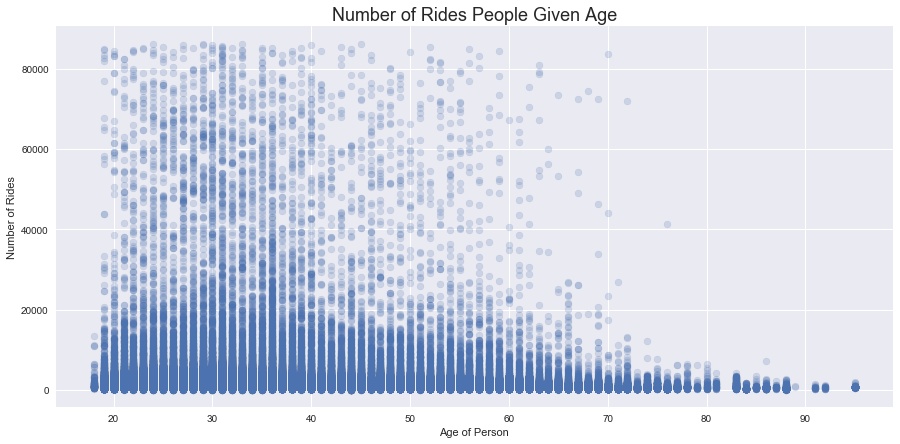

In [19]:
#Visualizing the data
plt.figure(figsize = (15, 7))
plt.scatter(data = gobike_df_membersonly, x = 'member_age', y = 'duration_sec', alpha = 0.2);
plt.style.use('seaborn')
plt.title('Number of Rides People Given Age', fontsize = 18);
plt.xlabel('Age of Person');
plt.ylabel('Number of Rides');

#### Do people tend to take longer rides given the month of the year?

Living in the Midwest, I know that bike sharing would significantly decline in colder months. I'm curious if the same holds true even in these warmer climates. And interestingly enough, the data seems to verify that that holds true even for California!

C:\Users\ezv9\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


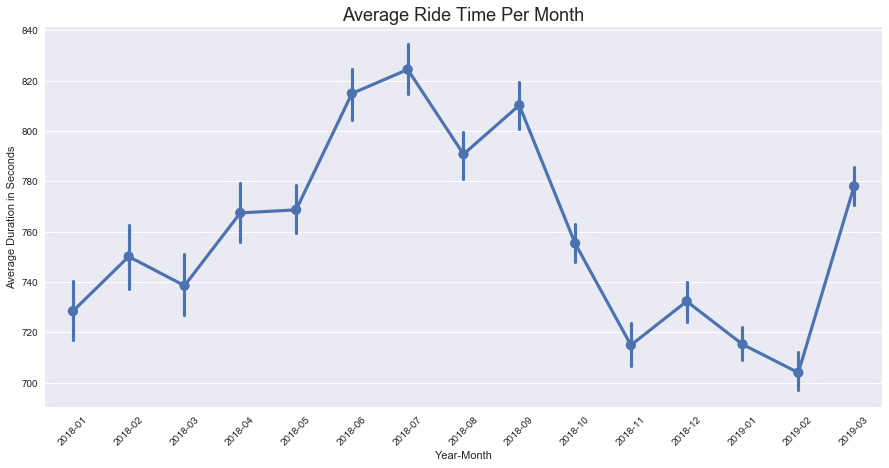

In [21]:
#Visualizing the data
plt.figure(figsize = (15, 7))
sb.pointplot(data = gobike_df_membersonly, x = 'year-month', y = 'duration_sec');
plt.xticks(rotation = 90);
plt.title('Average Ride Time Per Month', fontsize = 18);
plt.ylabel('Average Duration in Seconds');
plt.xlabel('Year-Month');
plt.style.use('seaborn')

#### How long did people ride bikes from the five most frequently visited stations?
From the five most frequently visited places to start a bike ride, I was curious to see how long these bike rides tended to last. What I found, sort of unsurprisingly, is they all landed around that average ride time of about 600 seconds. What is interesting, however, is that the distribution is a fair bit wider for the fifth station listed, San Franscisco Ferry Building. Not living in San Franscisco myself, it's hard to tell why that is, but I'm sure locals might have some insight onto why that may be.

In [20]:
#Figuring out which stations are the ones most frequently visited and building a dataframe off of them
top_starts = gobike_df['start_station_name'].value_counts().index[:5]
gobike_df_stations = gobike_df.loc[gobike_df['start_station_name'].isin(top_starts)]

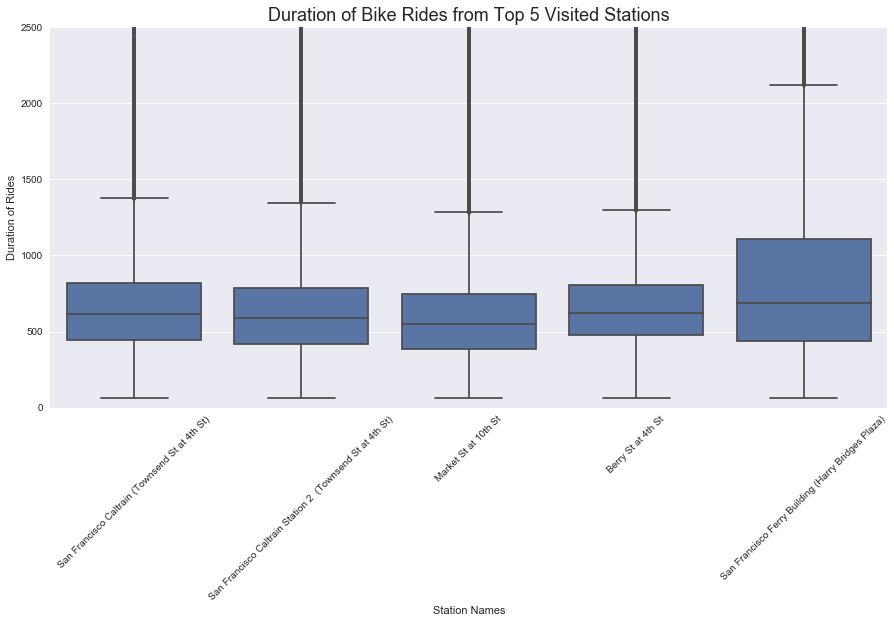

In [22]:
#Visualizing the data
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,7))
sb.boxplot(data = gobike_df_stations, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.style.use('seaborn')

## Multivariate Exploration

Finally, let's wrap up this notebook with a couple of multivariate explorations.

#### Which gender tends to take longer rides, and how does that also compare to age?

In this next visualization, we'll use some gender distinctive markers to determine how long rides tend to be across the genders and as a person gets older. Not surprisingly, the durations taper off as a person gets older, but the data doesn't at all seem to suggest that any single gender has a "stronger" longevity as they get older. In other words, we see just as many women and unnamed gender people riding just as long (if not longer) than men.

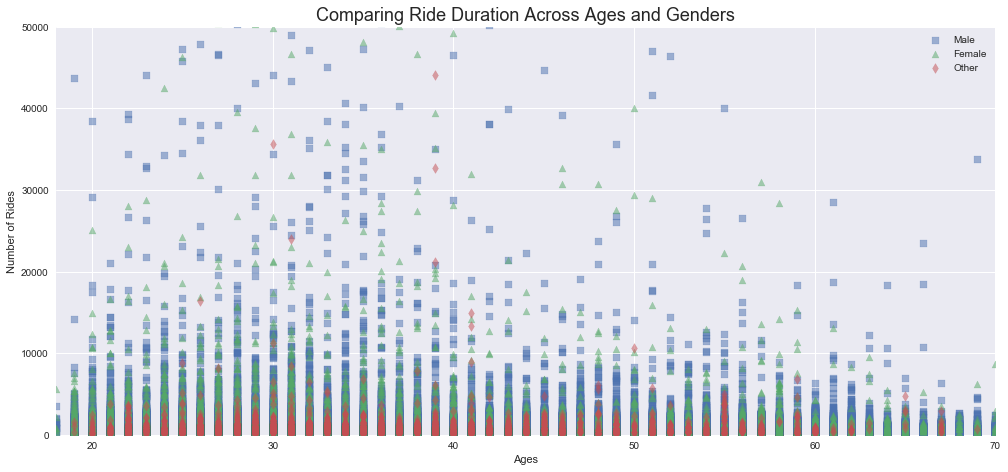

In [37]:
#visualizing the data with a sample size of 250000 records
gobike_df_mo_samp = gobike_df_membersonly.sample(250000)

plt.figure(figsize = (15,7))

cat_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'd']]

for cat, marker in cat_markers:
    df_gender = gobike_df_mo_samp[gobike_df_mo_samp['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_age', y = 'duration_sec', marker = marker, alpha = .5);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(18, 70);
plt.ylim(0, 50000);
plt.title('Comparing Ride Duration Across Ages and Genders', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')

#### What are number of rides per age group over time?

In this final visualization, we'll look at the number of rides people take over time, segmented by respective age groups. Because the visualization got a little busy with too many age groups, we'll analyze only those going up to age 69.

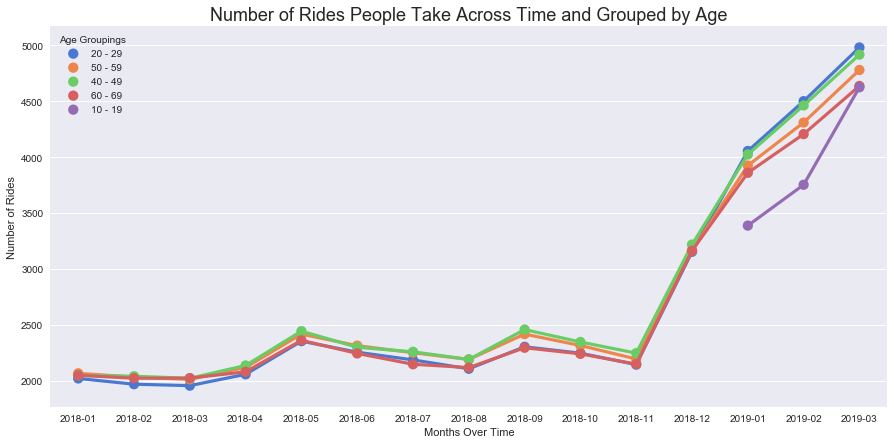

In [26]:
#Visualizing the data
gobike_df_sub = gobike_df_membersonly.loc[gobike_df_membersonly['age_group'].isin(['10 - 19', '20 - 29', '30-39', '40 - 49',
                                                                              '50 - 59', '60 - 69'])]

plt.figure(figsize = (15, 7))
plt.style.use('seaborn')
sb.pointplot(data = gobike_df_sub.sort_values(by='year-month'), x = 'year-month', y = 'bike_id',
             hue = 'age_group', palette = 'muted', ci = None);
plt.title('Number of Rides Per Age Group Over Time', fontsize = 18);
plt.legend(title = 'Age Groupings');
plt.title('Number of Rides People Take Across Time and Grouped by Age', fontsize = 18);
plt.xlabel('Months Over Time');
plt.ylabel('Number of Rides');